 
# Visualizing a single network

[Open interactive notebook in Binder](https://mybinder.org/v2/gh/wiheto/netplotbrain/main?filepath=docs/gallery/plot_connectivitymatrix.ipynb)

## Goal
Here we are plot the nodes on the brain from the Schaefer atlas and plot the connectivity matrix next to it


In [1]:
# Import packages
import templateflow.api as tf
import netplotbrain
import pandas as pd

In [2]:
# Get template information
template = 'MNI152NLin2009cAsym'
atlas = 'Schaefer2018'
atlas_desc = '100Parcels7Networks'

In [3]:
# Get and load the tsv file (information about the atlas)
atlas_path = tf.get(atlas=atlas,
                    template=template, 
                    desc=atlas_desc, 
                    extension='.tsv')
atlas_df = pd.read_csv(atlas_path, sep='\t')
atlas_df.head()

,index,name,color
0,1,7Networks_LH_Vis_1,#781283
1,2,7Networks_LH_Vis_2,#781284
2,3,7Networks_LH_Vis_3,#781285
3,4,7Networks_LH_Vis_4,#781287
4,5,7Networks_LH_Vis_5,#781288


In [4]:
# Create a column called "network" by extracting the relevant information from the column "name"
atlas_df['network'] = list(map(lambda x: x.split('_')[2], atlas_df.name.values))
atlas_df.head()

,index,name,color,network
0,1,7Networks_LH_Vis_1,#781283,Vis
1,2,7Networks_LH_Vis_2,#781284,Vis
2,3,7Networks_LH_Vis_3,#781285,Vis
3,4,7Networks_LH_Vis_4,#781287,Vis
4,5,7Networks_LH_Vis_5,#781288,Vis


(<Figure size 648x252 with 4 Axes>,
 [<Axes3D: title={'center': 'Left'}>,
  <Axes3D: title={'center': 'Superior'}>,
  <Axes: >,
  <Axes: >])

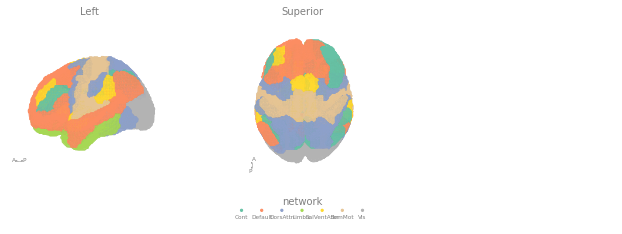

In [5]:
# Nodes in connectivity will automatically be organized by node_color, unless cm_order is specified. 
netplotbrain.plot(nodes={'template': 'MNI152NLin2009cAsym',
                         'atlas': atlas,
                         'desc': atlas_desc,
                         'resolution': 1},
                  view='LSc', 
                  node_type='parcels', 
                  nodes_df=atlas_df, 
                  node_color='network', 
                  node_cmap='Set2')